In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
pd.options.plotting.backend = "plotly"
import datetime
import missingno as msno

In [6]:
# dataset path
alerts_path = r'Data\\aggregate_alerts_Kota Depok.csv'
median_irregularities_path = r'Data\\aggregate_median_irregularities_Kota Depok.csv'
median_jams_path = r'Data\\aggregate_median_jams_Kota Depok.csv'

# Data understanding

## Jams

In [7]:
df_jams = pd.read_csv(median_jams_path)
df_jams = df_jams.drop(['Unnamed: 0'], axis=1)
df_jams.head(3)

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry
0,2022-07-06 00:00:00.000,32.76,KOTA DEPOK,Tole Iskandar,2,867.0,127.0,14.00,1,33482698,2022-07-06,2.0,"LINESTRING (106.837496 -6.403788, 106.837451 -..."
1,2022-07-06 00:00:00.000,32.76,KOTA DEPOK,Bukit Cinere,3,421.0,92.0,10.26,1,33482683,2022-07-06,3.0,"LINESTRING (106.793532 -6.339868, 106.79333 -6..."
2,2022-07-06 00:00:00.000,32.76,KOTA DEPOK,Tole Iskandar,3,1236.0,186.0,13.66,11,33482699,2022-07-06,3.0,"MULTILINESTRING ((106.840781 -6.404241, 106.84..."


In [8]:
# analisis null value
df_jams.isna().sum().plot(kind='bar')

In [53]:
# analisis statistik
df_jams.describe()

,kemendagri_kabupaten_kode,level,median_length,median_delay,median_speed_kmh,total_records,id,median_level
count,157218.00,157218.000000,157218.000000,157218.000000,157218.000000,157218.000000,1.572180e+05,157218.000000
mean,32.76,2.420181,777.908121,137.606693,12.808924,18.917796,3.542952e+07,2.420181
std,0.00,1.013765,582.178984,128.711199,7.397666,28.902927,1.105491e+06,1.013765
min,32.76,1.000000,25.000000,-1.000000,0.000000,1.000000,3.348268e+07,1.000000
25%,32.76,2.000000,397.000000,74.000000,7.040000,4.000000,3.445209e+07,2.000000
50%,32.76,2.000000,647.000000,96.000000,11.930000,10.000000,3.540958e+07,2.000000
75%,32.76,3.000000,1030.000000,145.000000,17.035000,22.000000,3.638440e+07,3.000000
max,32.76,5.000000,17782.000000,3901.000000,67.480000,244.000000,3.729072e+07,5.000000


In [54]:
# analisis kolom
print(df_jams.info())
df_jams['median_level'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157218 entries, 0 to 157217
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   time                       157218 non-null  object 
 1   kemendagri_kabupaten_kode  157218 non-null  float64
 2   kemendagri_kabupaten_nama  157218 non-null  object 
 3   street                     154459 non-null  object 
 4   level                      157218 non-null  int64  
 5   median_length              157218 non-null  float64
 6   median_delay               157218 non-null  float64
 7   median_speed_kmh           157218 non-null  float64
 8   total_records              157218 non-null  int64  
 9   id                         157218 non-null  int64  
 10  date                       157218 non-null  object 
 11  median_level               157218 non-null  float64
 12  geometry                   157218 non-null  object 
dtypes: float64(5), int64(3), obje

array([2., 3., 1., 5., 4.])

In [13]:
# sampling jalan dengan data terbanyak (3 sample jalan)
df_jams_clean = df_jams[df_jams['street'].notna()]
street_list = pd.DataFrame(columns=['street_name', 'total'])

for street in (df_jams_clean['street'].unique()):
  street_list = pd.concat([street_list, pd.DataFrame.from_records([{'street_name':street, 'total': len(df_jams_clean.loc[(df_jams['street'] == street)])}])])

street_list.sort_values(by='total', ascending=False).head(5)

,street_name,total
0,N8 Jalan Raya Bogor,3683
0,Margonda Raya,3632
0,Sawangan Raya,3537
0,Jalan Raya Bogor,3482
0,Tole Iskandar,3136


In [19]:
for i, street in enumerate(['N8 Jalan Raya Bogor', 'Margonda Raya', 'Sawangan Raya']):
  print(i, street)
  df_jams_sample = df_jams.loc[(df_jams['street'] == street)]
  df_jams_sample = df_jams_sample.drop(['kemendagri_kabupaten_kode', 'kemendagri_kabupaten_nama',
  'street', 'level', 'total_records', 'id', 'date', 'geometry'], axis=1)
  df_jams_sample['time'] = pd.to_datetime(df_jams_sample['time'])
  df_jams_agg = df_jams_sample.groupby(pd.Grouper(key="time", freq='1H')).agg({
    'median_length':np.median,
    'median_delay':np.mean,
    'median_speed_kmh':np.median,
    'median_level':np.mean})
  df_jams_agg['median_level'] = pd.to_numeric(df_jams_agg['median_level'].round(0))
  df_jams_agg.to_csv(r'Clean\sample_jams_{}.csv'.format(i))

0 N8 Jalan Raya Bogor
1 Margonda Raya
2 Sawangan Raya


0 N8 Jalan Raya Bogor
N8 Jalan Raya Bogor time


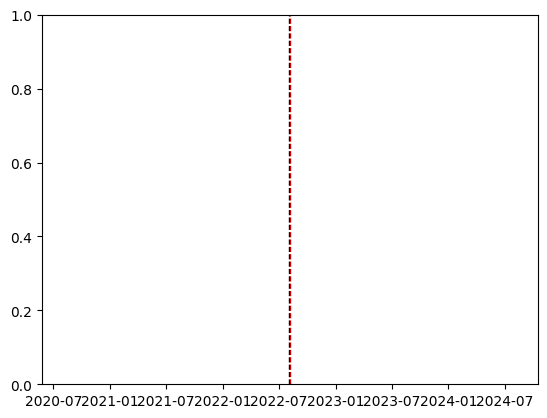

N8 Jalan Raya Bogor median_length


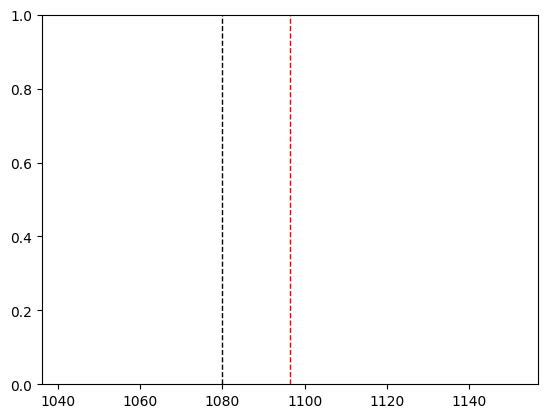

N8 Jalan Raya Bogor median_delay


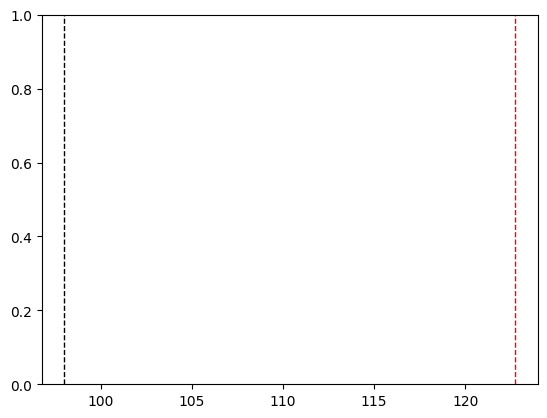

N8 Jalan Raya Bogor median_speed_kmh


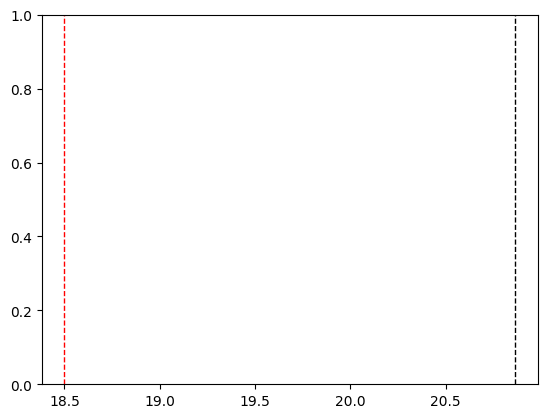

N8 Jalan Raya Bogor median_level


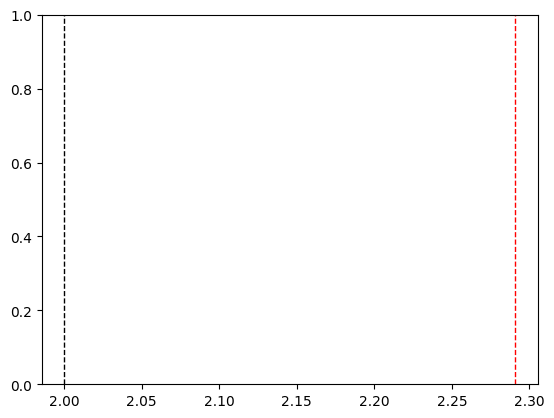

1 Margonda Raya
Margonda Raya time


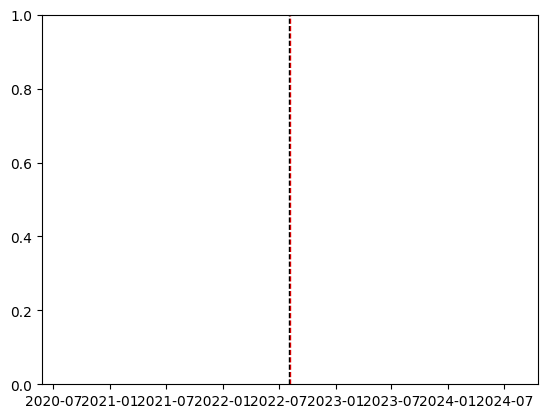

Margonda Raya median_length


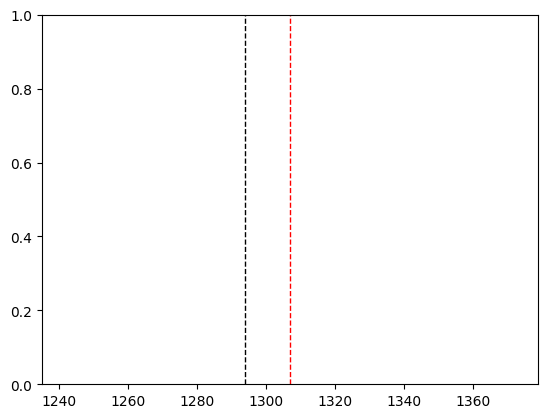

Margonda Raya median_delay


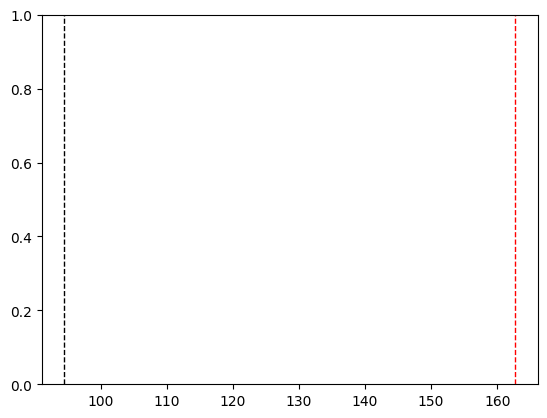

Margonda Raya median_speed_kmh


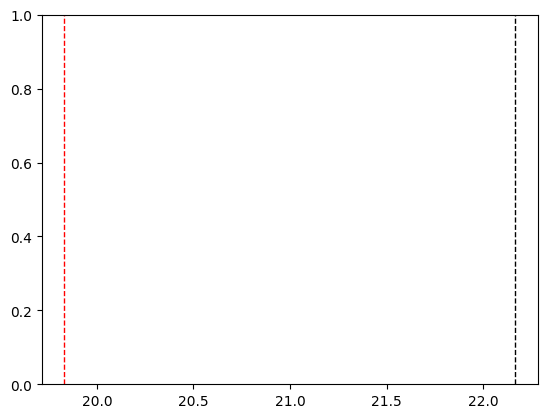

Margonda Raya median_level


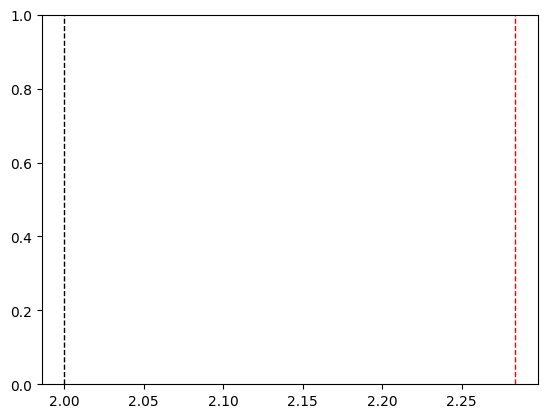

2 Sawangan Raya
Sawangan Raya time


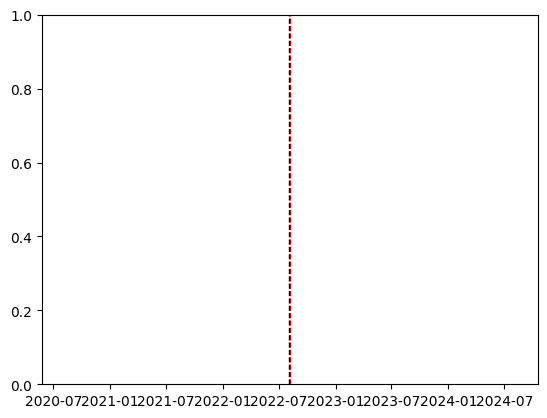

Sawangan Raya median_length


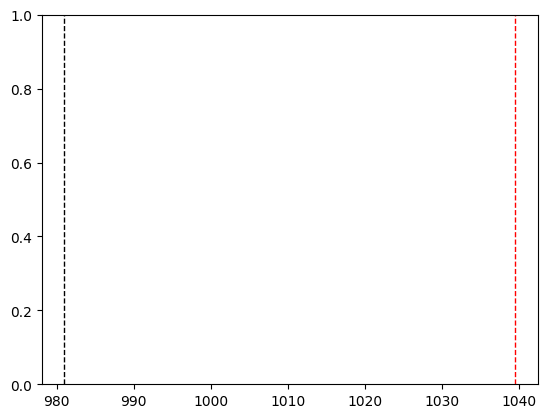

Sawangan Raya median_delay


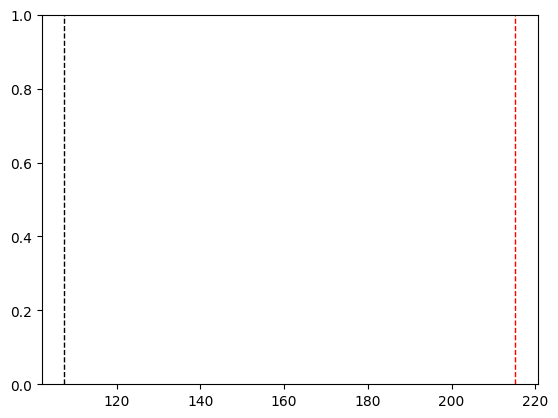

Sawangan Raya median_speed_kmh


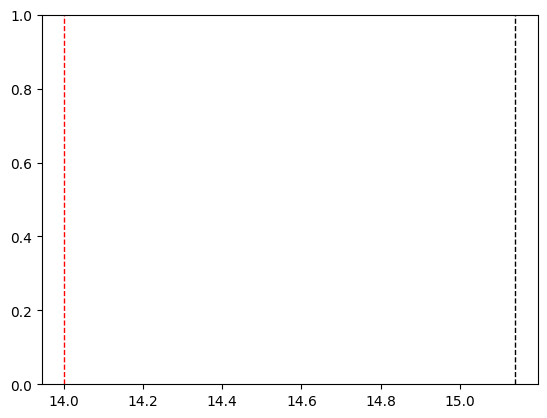

Sawangan Raya median_level


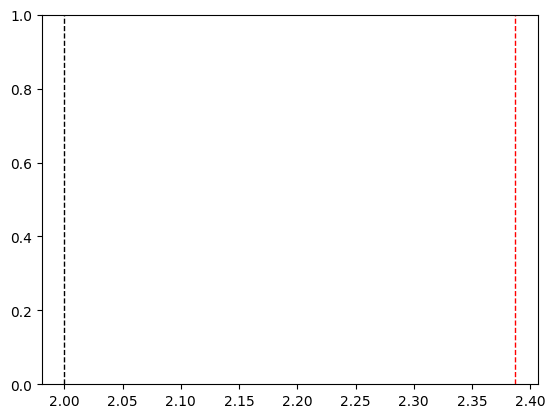

In [50]:
# visualisasi histogram
for i, street in enumerate(['N8 Jalan Raya Bogor', 'Margonda Raya', 'Sawangan Raya']):
  print(i, street)
  df_jams_sample = df_jams.loc[(df_jams['street'] == street)]
  df_jams_sample = df_jams_sample.drop(['kemendagri_kabupaten_kode', 'kemendagri_kabupaten_nama',
  'street', 'level', 'total_records', 'id', 'date', 'geometry'], axis=1)
  df_jams_sample['time'] = pd.to_datetime(df_jams_sample['time'])
  for col in df_jams_sample.columns:
    print(street, col)
    df_jams_sample[col].hist()
    plt.axvline(df_jams_sample[col].mean(), color='red', linestyle='dashed', linewidth=1)
    plt.axvline(df_jams_sample[col].median(), color='black', linestyle='dashed', linewidth=1)
    plt.show()

In [57]:
len(df_jams[df_jams["street"] == "N8 Jalan Raya Bogor"])

3683

In [52]:
df_jams.columns

Index(['time', 'kemendagri_kabupaten_kode', 'kemendagri_kabupaten_nama',
       'street', 'level', 'median_length', 'median_delay', 'median_speed_kmh',
       'total_records', 'id', 'date', 'median_level', 'geometry'],
      dtype='object')

In [64]:
df_jams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157218 entries, 0 to 157217
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   time                       157218 non-null  object 
 1   kemendagri_kabupaten_kode  157218 non-null  float64
 2   kemendagri_kabupaten_nama  157218 non-null  object 
 3   street                     154459 non-null  object 
 4   level                      157218 non-null  int64  
 5   median_length              157218 non-null  float64
 6   median_delay               157218 non-null  float64
 7   median_speed_kmh           157218 non-null  float64
 8   total_records              157218 non-null  int64  
 9   id                         157218 non-null  int64  
 10  date                       157218 non-null  object 
 11  median_level               157218 non-null  float64
 12  geometry                   157218 non-null  object 
dtypes: float64(5), int64(3), obje

In [86]:
pd.options.plotting.backend = "plotly"

<BarContainer object of 10 artists>

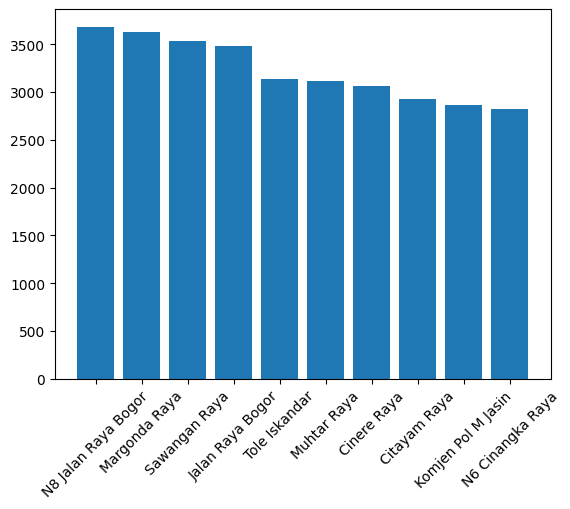

In [87]:
plt.xticks(rotation=45)
plt.bar(df_jams["street"].value_counts().head(10).index, df_jams["street"].value_counts().head(10).values)

In [102]:
df_jams["street"].value_counts().head(10).rename_axis("Jalan Ramai").to_frame("jumlah")

,jumlah
Jalan Ramai,
N8 Jalan Raya Bogor,3683
Margonda Raya,3632
Sawangan Raya,3537
Jalan Raya Bogor,3482
Tole Iskandar,3136
Muhtar Raya,3119
Cinere Raya,3060
Citayam Raya,2927
Komjen Pol M Jasin,2864


## Alerts

In [15]:
df_alerts = pd.read_csv(alerts_path)
df_alerts.head(3)

,id,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,type,avg_location,total_records,date
0,5931593,2022-07-06 00:00:00.000,32.76,KOTA DEPOK,Dewi Sartika,ROAD_CLOSED,"[106.81841149999966, -6.399794999999999]",240,2022-07-06
1,5931594,2022-07-06 00:00:00.000,32.76,KOTA DEPOK,Krukut Raya,WEATHERHAZARD,"[106.79100399999993, -6.363434999999996]",60,2022-07-06
2,5931595,2022-07-06 00:00:00.000,32.76,KOTA DEPOK,NaN,JAM,"[106.783179, -6.443203999999998]",22,2022-07-06


In [16]:
# analisis null value
df_alerts.isna().sum().plot(kind='bar')

In [17]:
# analisis statistik
df_alerts.describe()

,id,kemendagri_kabupaten_kode,total_records
count,1.804000e+04,18040.00,18040.000000
mean,6.082011e+06,32.76,57.487805
std,8.211988e+04,0.00,70.836164
min,5.931593e+06,32.76,1.000000
25%,6.009374e+06,32.76,15.000000
50%,6.085594e+06,32.76,30.000000
75%,6.153102e+06,32.76,60.000000
max,6.221717e+06,32.76,723.000000


In [18]:
# analisis kolom
print(df_alerts.info())
df_alerts['type'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18040 entries, 0 to 18039
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18040 non-null  int64  
 1   time                       18040 non-null  object 
 2   kemendagri_kabupaten_kode  18040 non-null  float64
 3   kemendagri_kabupaten_nama  18040 non-null  object 
 4   street                     16746 non-null  object 
 5   type                       18040 non-null  object 
 6   avg_location               18040 non-null  object 
 7   total_records              18040 non-null  int64  
 8   date                       18040 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 1.2+ MB
None


array(['ROAD_CLOSED', 'WEATHERHAZARD', 'JAM', 'ACCIDENT'], dtype=object)

In [19]:
# Simpan 3 sample jalan : N9 Raden KH Abdullah bin Nuh, N9 Jalan Raya Pajajaran, N9 Jalan Raya Dramaga
for i, street in enumerate(['N8 Jalan Raya Bogor', 'Margonda Raya', 'Sawangan Raya']):
  print(i, street)
  df_alerts_sample = df_alerts.loc[(df_alerts['street'] == street)]
  df_alerts_sample = df_alerts_sample.drop(['id', 'kemendagri_kabupaten_kode', 'kemendagri_kabupaten_nama', 'street'
  , 'avg_location', 'total_records', 'date'], axis=1)
  df_alerts_sample['time'] = pd.to_datetime(df_alerts_sample['time'])
  df_alerts_sample.to_csv(r'Clean\sample_alerts_{}.csv'.format(i), index=False)

0 N8 Jalan Raya Bogor
1 Margonda Raya
2 Sawangan Raya


<BarContainer object of 10 artists>

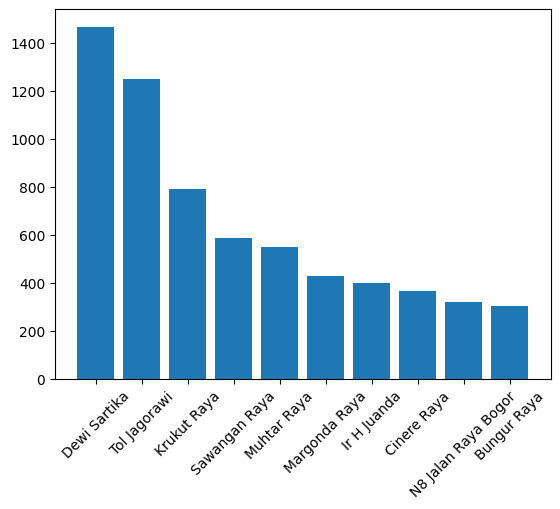

In [104]:
plt.xticks(rotation=45)
plt.bar(df_alerts["street"].value_counts().head(10).index, df_alerts["street"].value_counts().head(10).values)

## irregularities

In [20]:
df_irregularities = pd.read_csv(median_irregularities_path)
df_irregularities.head(3)

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,jam_level,median_length,median_delay_seconds,median_regular_speed,total_records,cause_type,median_seconds,median_speed,date,median_jam_level,id,geometry
0,2022-07-06 07:00:00.000,32.76,KOTA DEPOK,Prof Dr Mr Supomo,3,535.0,460.0,21.00,2,NaN,567.0,3.390,2022-07-06,3.0,1493443,"LINESTRING (106.831075 -6.357956, 106.831177 -..."
1,2022-07-06 07:00:00.000,32.76,KOTA DEPOK,Bungur Raya,3,604.0,382.0,7.91,2,NaN,472.0,4.605,2022-07-06,3.0,1493441,"LINESTRING (106.808105 -6.368486, 106.808505 -..."
2,2022-07-06 07:00:00.000,32.76,KOTA DEPOK,Bungur Raya,4,604.0,481.0,9.40,19,NaN,571.0,3.800,2022-07-06,4.0,1493442,"MULTILINESTRING ((106.813307 -6.369841, 106.81..."


In [21]:
# analisis null value
df_irregularities.isna().sum().plot(kind='bar')

In [22]:
# analisis statistik
df_irregularities.describe()

,kemendagri_kabupaten_kode,jam_level,median_length,median_delay_seconds,median_regular_speed,total_records,cause_type,median_seconds,median_speed,median_jam_level,id
count,8313.00,8313.000000,8313.000000,8313.000000,8313.000000,8313.000000,0.0,8313.000000,8313.000000,8313.000000,8.313000e+03
mean,32.76,3.466619,1398.474859,587.670877,17.814625,15.019367,NaN,735.419584,7.379200,3.466619,1.542598e+06
std,0.00,0.635320,1090.256454,301.120398,10.433042,15.318357,NaN,333.036230,4.849193,0.635320,2.585485e+04
min,32.76,1.000000,500.000000,77.000000,3.380000,1.000000,NaN,131.000000,0.550000,1.000000,1.493441e+06
25%,32.76,3.000000,759.000000,393.000000,12.180000,4.000000,NaN,519.000000,4.590000,3.000000,1.520158e+06
50%,32.76,4.000000,1166.000000,548.000000,16.190000,10.000000,NaN,686.000000,6.315000,4.000000,1.545023e+06
75%,32.76,4.000000,1711.000000,727.000000,20.280000,21.000000,NaN,896.500000,8.880000,4.000000,1.564390e+06
max,32.76,4.000000,18376.000000,3901.000000,97.910000,185.000000,NaN,4395.000000,62.630000,4.000000,1.583858e+06


In [23]:
# analisis kolom
print(df_irregularities.info())
df_irregularities['median_jam_level'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8313 entries, 0 to 8312
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   time                       8313 non-null   object 
 1   kemendagri_kabupaten_kode  8313 non-null   float64
 2   kemendagri_kabupaten_nama  8313 non-null   object 
 3   street                     8269 non-null   object 
 4   jam_level                  8313 non-null   int64  
 5   median_length              8313 non-null   float64
 6   median_delay_seconds       8313 non-null   float64
 7   median_regular_speed       8313 non-null   float64
 8   total_records              8313 non-null   int64  
 9   cause_type                 0 non-null      float64
 10  median_seconds             8313 non-null   float64
 11  median_speed               8313 non-null   float64
 12  date                       8313 non-null   object 
 13  median_jam_level           8313 non-null   float

array([3., 4., 2., 1.])

In [24]:
# no null, all row are ok
for i, street in enumerate(['N8 Jalan Raya Bogor', 'Margonda Raya', 'Sawangan Raya']):
  print(i, street)
  df_irr_sample = df_irregularities.loc[(df_irregularities['street'] == street)]
  df_irr_sample = df_irr_sample.drop(['id', 'kemendagri_kabupaten_kode', 'kemendagri_kabupaten_nama', 'street'
  , 'jam_level', 'total_records', 'cause_type', 'date', 'id', 'geometry'], axis=1)
  df_irr_sample['time'] = pd.to_datetime(df_irr_sample['time'])
  # df_irr_agg = df_irr_sample.groupby(pd.Grouper(key="time", freq='1H')).mean()
  df_irr_sample.to_csv(r'Clean\sample_irr_{}.csv'.format(i))

0 N8 Jalan Raya Bogor
1 Margonda Raya
2 Sawangan Raya


<BarContainer object of 10 artists>

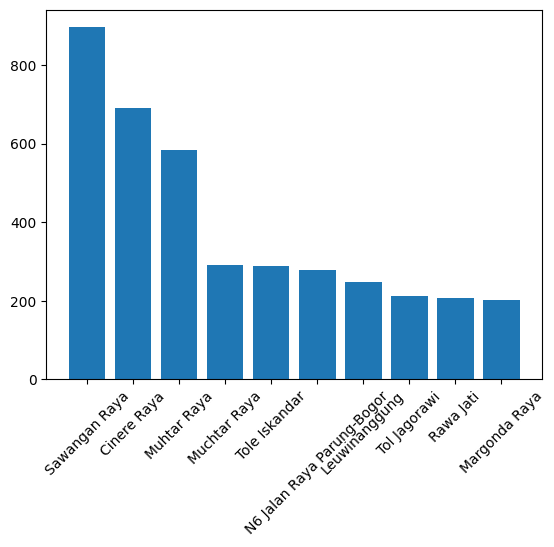

In [105]:
plt.xticks(rotation=45)
plt.bar(df_irregularities["street"].value_counts().head(10).index, df_irregularities["street"].value_counts().head(10).values)

#   Penyatuan Kolom dan Penghilangan Nilai NaN

## jalan 0

In [25]:
df_sample_jams = pd.read_csv(r'Clean\sample_jams_0.csv')
df_sample_jams.isnull().sum()

time                  0
median_length       308
median_delay        308
median_speed_kmh    308
median_level        308
dtype: int64

In [26]:
df_sample_jams = pd.read_csv(r'Clean\sample_jams_0.csv')
# df_sample_jams.isnull().sum()
df_sample_jams['time'] = pd.to_datetime(df_sample_jams['time'])
df_sample_jams = df_sample_jams.set_index('time')
total = 0
for i in range(0, 24):
  total_row = len(df_sample_jams[df_sample_jams.index.hour == i])
  null_value = df_sample_jams[df_sample_jams.index.hour == i].isna().sum()[1]
  total += null_value
  print(f"jam {i}, null value: {null_value}/{total_row}")
print('total: ', total)

jam 0, null value: 41/61
jam 1, null value: 51/61
jam 2, null value: 50/61
jam 3, null value: 54/61
jam 4, null value: 50/61
jam 5, null value: 15/61
jam 6, null value: 8/61
jam 7, null value: 2/61
jam 8, null value: 2/61
jam 9, null value: 1/61
jam 10, null value: 1/61
jam 11, null value: 1/61
jam 12, null value: 1/61
jam 13, null value: 1/61
jam 14, null value: 3/61
jam 15, null value: 1/61
jam 16, null value: 1/61
jam 17, null value: 1/61
jam 18, null value: 1/61
jam 19, null value: 1/61
jam 20, null value: 1/61
jam 21, null value: 1/61
jam 22, null value: 2/61
jam 23, null value: 18/60
total:  308


In [27]:
def clean_df(df_jams_agg):
  list_index = []
  for i in [0, 1, 2, 3, 4, 5, 23]:
    list_index.extend(df_jams_agg[df_jams_agg.index.hour == i].index)
  print(str(len(list_index))+' data cleaned')
  df_jams_agg_clean = df_jams_agg.drop(list_index)
  for i in [6,7,8,20,21,22]:
    df_null = df_jams_agg_clean[df_jams_agg_clean.index.hour == i]
    replaced_index = df_null[df_null.median_length.isnull()].index
    median_values = []
    for col in df_null.columns:
      if col == 'median_level':
        median_values.append(round(df_null[col].mean(), 0))
        continue
      median_values.append(df_null[col].median())
    for idx in replaced_index:
      for col_idx, col_name in enumerate(df_null.columns):
        df_jams_agg_clean.loc[idx, col_name] = median_values[col_idx]
  df_jams_agg_clean['median_level'] = df_jams_agg_clean['median_level'].fillna(0).astype(int)
  return df_jams_agg_clean

df_jams_agg_clean = clean_df(df_sample_jams)
df_jams_agg_clean
df_jams_agg_clean.to_csv(r'Clean\sample_jams_cleaned_0.csv')

426 data cleaned


## jalan 1

In [28]:
df_sample_jams = pd.read_csv(r'Clean\sample_jams_1.csv')
df_sample_jams.isnull().sum()

time                  0
median_length       287
median_delay        287
median_speed_kmh    287
median_level        287
dtype: int64

In [29]:
df_sample_jams.head(28)

,time,median_length,median_delay,median_speed_kmh,median_level
0,2022-07-06 00:00:00,1344.00,67.000000,28.430000,1.0
1,2022-07-06 01:00:00,NaN,NaN,NaN,NaN
2,2022-07-06 02:00:00,NaN,NaN,NaN,NaN
3,2022-07-06 03:00:00,955.00,89.000000,21.915000,2.0
4,2022-07-06 04:00:00,1100.00,76.250000,25.905000,2.0
5,2022-07-06 05:00:00,876.50,76.750000,21.627501,2.0
6,2022-07-06 06:00:00,1535.00,87.000000,28.180000,2.0
7,2022-07-06 07:00:00,1221.00,123.375000,20.907500,2.0
8,2022-07-06 08:00:00,1159.00,88.666667,23.260000,2.0
9,2022-07-06 09:00:00,1377.75,191.375000,18.935000,2.0


In [30]:
df_sample_jams = pd.read_csv(r'Clean\sample_jams_1.csv')
# df_sample_jams.isnull().sum()
df_sample_jams['time'] = pd.to_datetime(df_sample_jams['time'])
df_sample_jams = df_sample_jams.set_index('time')
total = 0
for i in range(0, 24):
  total_row = len(df_sample_jams[df_sample_jams.index.hour == i])
  null_value = df_sample_jams[df_sample_jams.index.hour == i].isna().sum()[1]
  total += null_value
  print(f"jam {i}, null value: {null_value}/{total_row}")
print('total: ', total)

jam 0, null value: 30/63
jam 1, null value: 40/62
jam 2, null value: 49/62
jam 3, null value: 44/62
jam 4, null value: 43/62
jam 5, null value: 15/62
jam 6, null value: 11/62
jam 7, null value: 6/62
jam 8, null value: 6/62
jam 9, null value: 2/62
jam 10, null value: 2/62
jam 11, null value: 2/62
jam 12, null value: 2/62
jam 13, null value: 2/62
jam 14, null value: 2/62
jam 15, null value: 2/62
jam 16, null value: 2/62
jam 17, null value: 2/62
jam 18, null value: 2/62
jam 19, null value: 2/62
jam 20, null value: 2/62
jam 21, null value: 2/62
jam 22, null value: 6/62
jam 23, null value: 11/62
total:  287


In [31]:
df_sample_jams = df_sample_jams.drop(df_sample_jams[df_sample_jams.index.date == datetime.date(2022,9,5)].index)
df_sample_jams = df_sample_jams.drop(df_sample_jams[df_sample_jams.index.date == datetime.date(2022,9,6)].index)
df_sample_jams.tail()

,median_length,median_delay,median_speed_kmh,median_level
time,,,,
2022-09-04 19:00:00,1760.0,137.333333,24.380,2.0
2022-09-04 20:00:00,1760.0,125.166667,26.020,2.0
2022-09-04 21:00:00,1335.0,87.333333,24.370,2.0
2022-09-04 22:00:00,787.0,63.333333,18.235,2.0
2022-09-04 23:00:00,1313.0,68.500000,27.210,2.0


In [32]:
def clean_df(df_jams_agg):
  list_index = []
  for i in [0, 1, 2, 3, 4, 5, 23]:
    list_index.extend(df_jams_agg[df_jams_agg.index.hour == i].index)
  print(str(len(list_index))+' data cleaned')
  df_jams_agg_clean = df_jams_agg.drop(list_index)
  for i in [6,7,8,20,21,22]:
    df_null = df_jams_agg_clean[df_jams_agg_clean.index.hour == i]
    replaced_index = df_null[df_null.median_length.isnull()].index
    median_values = []
    for col in df_null.columns:
      if col == 'median_level':
        median_values.append(round(df_null[col].mean(), 0))
        continue
      median_values.append(df_null[col].median())
    for idx in replaced_index:
      for col_idx, col_name in enumerate(df_null.columns):
        df_jams_agg_clean.loc[idx, col_name] = median_values[col_idx]
  df_jams_agg_clean['median_level'] = df_jams_agg_clean['median_level'].fillna(0).astype(int)
  return df_jams_agg_clean

df_jams_agg_clean = clean_df(df_sample_jams)
df_jams_agg_clean
df_jams_agg_clean.to_csv(r'Clean\sample_jams_cleaned_1.csv')

427 data cleaned


## jalan 2

In [33]:
df_sample_jams = pd.read_csv(r'Clean\sample_jams_2.csv')
df_sample_jams.isnull().sum()

time                  0
median_length       359
median_delay        359
median_speed_kmh    359
median_level        359
dtype: int64

In [34]:
df_sample_jams = pd.read_csv(r'Clean\sample_jams_2.csv')
df_sample_jams['time'] = pd.to_datetime(df_sample_jams['time'])
df_sample_jams = df_sample_jams.set_index('time')
total = 0
for i in range(0, 24):
  total_row = len(df_sample_jams[df_sample_jams.index.hour == i])
  null_value = df_sample_jams[df_sample_jams.index.hour == i].isna().sum()[1]
  total += null_value
  print(f"jam {i}, null value: {null_value}/{total_row}")
print('total: ', total)

jam 0, null value: 45/61
jam 1, null value: 51/61
jam 2, null value: 58/61
jam 3, null value: 55/61
jam 4, null value: 57/61
jam 5, null value: 33/61
jam 6, null value: 11/61
jam 7, null value: 8/61
jam 8, null value: 2/61
jam 9, null value: 1/61
jam 10, null value: 1/61
jam 11, null value: 1/61
jam 12, null value: 2/61
jam 13, null value: 1/61
jam 14, null value: 1/61
jam 15, null value: 1/61
jam 16, null value: 1/61
jam 17, null value: 1/61
jam 18, null value: 1/61
jam 19, null value: 1/61
jam 20, null value: 1/61
jam 21, null value: 1/61
jam 22, null value: 2/61
jam 23, null value: 23/61
total:  359


In [35]:
def clean_df(df_jams_agg):
  list_index = []
  for i in [0, 1, 2, 3, 4, 5, 23]:
    list_index.extend(df_jams_agg[df_jams_agg.index.hour == i].index)
  print(str(len(list_index))+' data cleaned')
  df_jams_agg_clean = df_jams_agg.drop(list_index)
  for i in [6,7,8,20,21,22]:
    df_null = df_jams_agg_clean[df_jams_agg_clean.index.hour == i]
    replaced_index = df_null[df_null.median_length.isnull()].index
    median_values = []
    for col in df_null.columns:
      if col == 'median_level':
        median_values.append(round(df_null[col].mean(), 0))
        continue
      median_values.append(df_null[col].median())
    for idx in replaced_index:
      for col_idx, col_name in enumerate(df_null.columns):
        df_jams_agg_clean.loc[idx, col_name] = median_values[col_idx]
  df_jams_agg_clean['median_level'] = df_jams_agg_clean['median_level'].fillna(0).astype(int)
  return df_jams_agg_clean

df_jams_agg_clean = clean_df(df_sample_jams)
df_jams_agg_clean
df_jams_agg_clean.to_csv(r'Clean\sample_jams_cleaned_2.csv')

427 data cleaned


# Analisis Tambahan

In [112]:
df_jams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157218 entries, 0 to 157217
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   time                       157218 non-null  object 
 1   kemendagri_kabupaten_kode  157218 non-null  float64
 2   kemendagri_kabupaten_nama  157218 non-null  object 
 3   street                     154459 non-null  object 
 4   level                      157218 non-null  int64  
 5   median_length              157218 non-null  float64
 6   median_delay               157218 non-null  float64
 7   median_speed_kmh           157218 non-null  float64
 8   total_records              157218 non-null  int64  
 9   id                         157218 non-null  int64  
 10  date                       157218 non-null  object 
 11  median_level               157218 non-null  float64
 12  geometry                   157218 non-null  object 
dtypes: float64(5), int64(3), obje

In [108]:
df_alerts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18040 entries, 0 to 18039
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18040 non-null  int64  
 1   time                       18040 non-null  object 
 2   kemendagri_kabupaten_kode  18040 non-null  float64
 3   kemendagri_kabupaten_nama  18040 non-null  object 
 4   street                     16746 non-null  object 
 5   type                       18040 non-null  object 
 6   avg_location               18040 non-null  object 
 7   total_records              18040 non-null  int64  
 8   date                       18040 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 1.2+ MB


In [107]:
df_irregularities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8313 entries, 0 to 8312
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   time                       8313 non-null   object 
 1   kemendagri_kabupaten_kode  8313 non-null   float64
 2   kemendagri_kabupaten_nama  8313 non-null   object 
 3   street                     8269 non-null   object 
 4   jam_level                  8313 non-null   int64  
 5   median_length              8313 non-null   float64
 6   median_delay_seconds       8313 non-null   float64
 7   median_regular_speed       8313 non-null   float64
 8   total_records              8313 non-null   int64  
 9   cause_type                 0 non-null      float64
 10  median_seconds             8313 non-null   float64
 11  median_speed               8313 non-null   float64
 12  date                       8313 non-null   object 
 13  median_jam_level           8313 non-null   float